author = AllenEdgarPoe chsjk9005@naver.com

In [1]:
import openpyxl
from matplotlib import pyplot as plt
from collections import defaultdict
battleground = openpyxl.load_workbook('BattleGround2.xlsx')

### Data Extraction

#### Killed Data

In [2]:
sheet = battleground['Sheet1']
killed_by = sheet['D5':'E145']
weapon_set = set()
Killed =[]
for weapon,distance in killed_by:
    if distance.value:
        weapon_set.add(weapon.value)
        Killed.append((weapon.value, distance.value))

In [3]:
from collections import defaultdict
weapon_distance = defaultdict(list)
for weapon,distance in Killed:
    weapon_distance[weapon].append(distance)
Killed_list = {weapon:sorted(list(distance)) for weapon, distance in weapon_distance.items()}

#### Kill data

In [4]:
whole = []
for i in range(6,24):
    data = [sheet.cell(row = j, column =i).value for j in range(1,83) if sheet.cell(row=j,column = i).value]
    weapon = data[0]
    average = data[1:3]
    distance = sorted(data[3:])
    whole.append((weapon,distance))
Kill_list = dict(whole)

### Killed data via weapon kinds

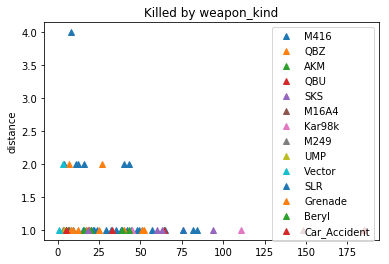

In [5]:
# plt.style.use('seaborn')
# plt.figure(figsize = (8,8))
for weapon in Killed_list:
    dist = list(set(Killed_list[weapon]))
    freq = [Killed_list[weapon].count(i) for i in dist]
    plt.plot(dist, freq,'^',label = weapon)

plt.ylabel('distance')
plt.title('Killed by weapon_kind')
plt.legend()  

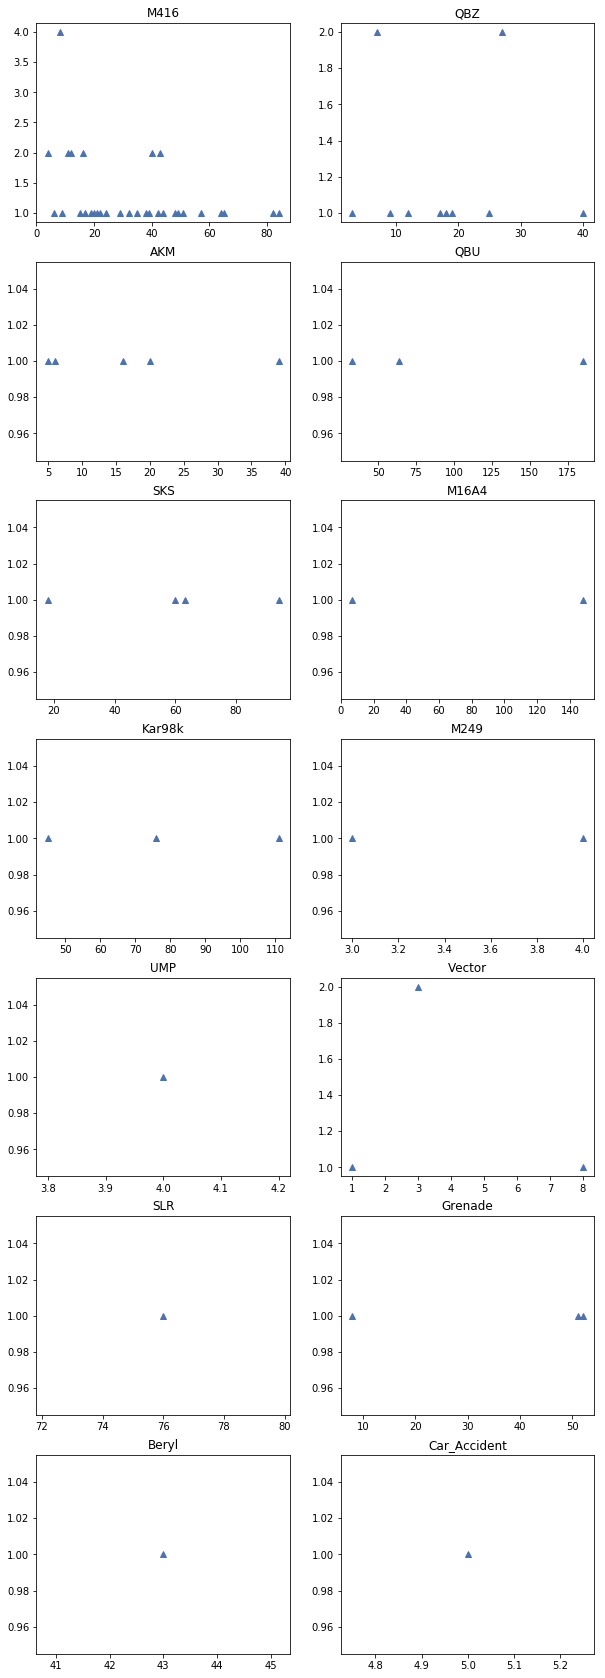

In [13]:
plt.style.use('seaborn-deep')
fig, axes = plt.subplots(7,2,figsize = (10,30))
ax = axes.ravel()
plt.title('Killed via Weapon_kinds')  
for num in range(len(Killed_list)):
    weapon = list(Killed_list.keys())[num]
    dist = list(Killed_list.values())[num]
    freq = [dist.count(i) for i in list(set(dist))]
    ax[num].plot(list(set(dist)), freq,'^',label = weapon)
    ax[num].set_title(weapon)
  

### Kill data via Weapon_kinds

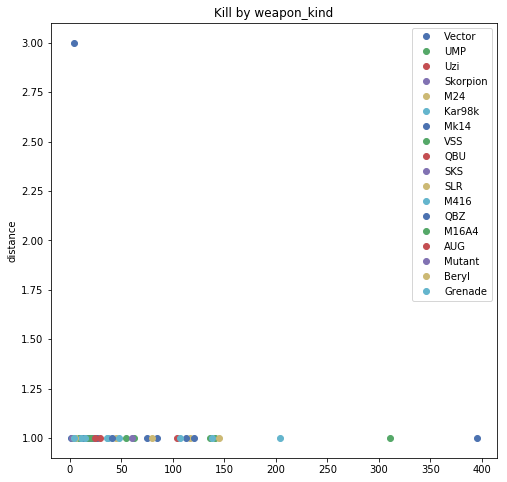

In [29]:
# plt.style.use('seaborn')
plt.figure(figsize = (8,8))
for weapon in Kill_list:
    dist = list(set(Kill_list[weapon]))
    freq = [Kill_list[weapon].count(i) for i in dist]
    plt.plot(dist, freq,'o',label = weapon)

plt.ylabel('distance')
plt.title('Kill by weapon_kind')
plt.legend()  

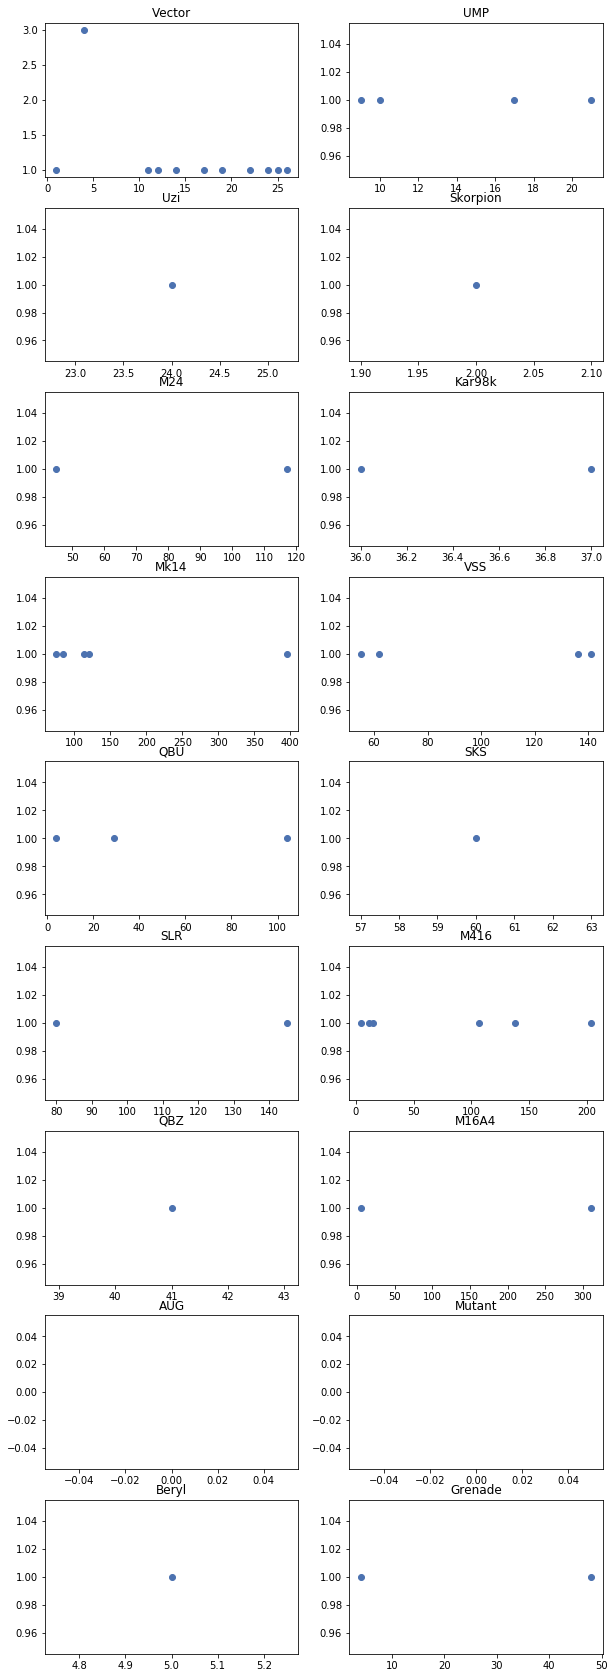

In [12]:
plt.style.use('seaborn-deep')
fig, axes = plt.subplots(9,2,figsize = (10,30))
ax = axes.ravel()
plt.title('Kill via Weapon_kinds')  
for num in range(len(Kill_list)):
    weapon = list(Kill_list.keys())[num]
    dist = list(Kill_list.values())[num]
    freq = [dist.count(i) for i in list(set(dist))]
    ax[num].plot(list(set(dist)), freq,'o',label = weapon)
    ax[num].set_title(weapon)
  

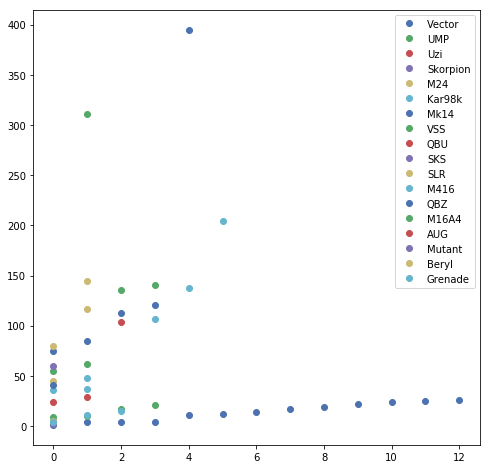

In [32]:
plt.figure(figsize=(8,8))
for weapon in Kill_list:
    num = len(Kill_list[weapon])
    plt.plot(range(num), Kill_list[weapon],'o',label = weapon)
plt.legend() 

### Kill vs Killed via same weapon 

In [15]:
import numpy as np
inter_weapon = [i for i in Killed_list if i in Kill_list]
inter_killed = np.array([Killed_list[i] for i in Killed_list if i in Kill_list])
inter_kill = np.array([Kill_list[i] for i in Killed_list if i in Kill_list])

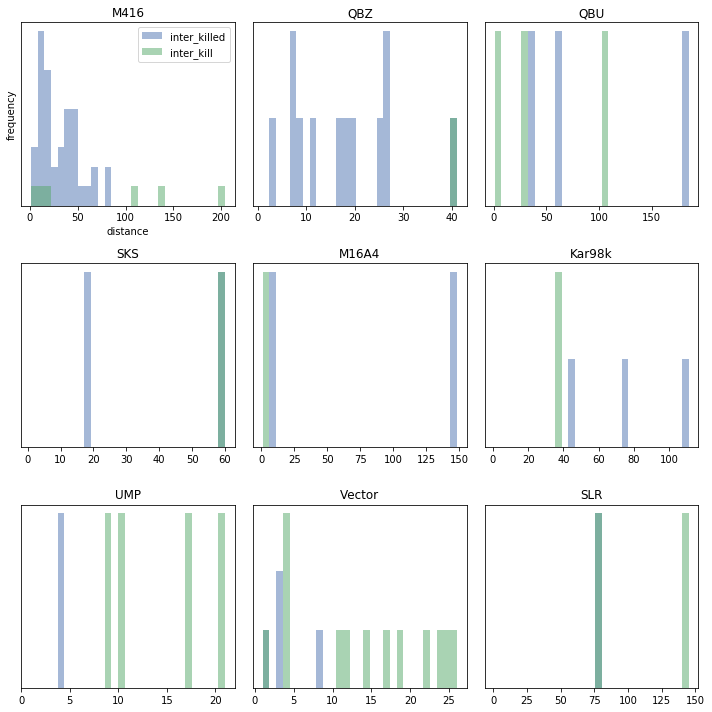

In [27]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
ax = axes.ravel()
bins = np.linspace(1, 150, 30)

for i in range(9):
    bins = np.linspace(1, max(max(inter_killed[i], inter_kill[i])), 30)
    ax[i].hist(inter_killed[i], bins = bins, alpha = .5, label = 'inter_killed')
    ax[i].hist(inter_kill[i], bins = bins, alpha = .5, label = 'inter_kill')
    ax[i].set_title(inter_weapon[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('distance')
ax[0].set_ylabel('frequency')
ax[0].legend()
fig.tight_layout()

### Entire Distance Data

In [33]:
kill_distance = sorted([j for i in Kill_list.values() for j in i])
killed_distance = sorted([j for i in Killed_list.values() for j in i])

Text(0.5,1,'BattleGround Kill')

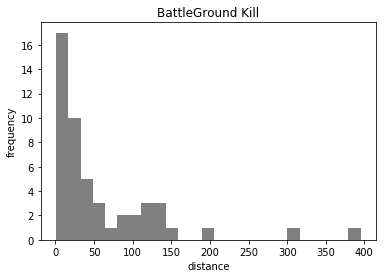

In [34]:
plt.hist(kill_distance, bins = 25, color = 'gray')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('BattleGround Kill')

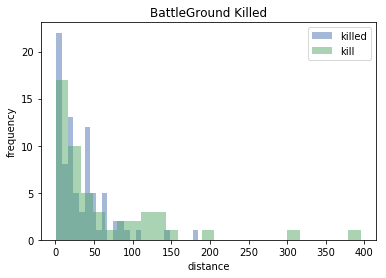

In [35]:
plt.hist(killed_distance, bins = 25, alpha = .5, label = 'killed')
plt.hist(kill_distance, bins = 25, alpha = .5, label = 'kill')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('BattleGround Killed')
plt.legend()